## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [3]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/home/delee/miniconda3/envs/snu_gpu/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


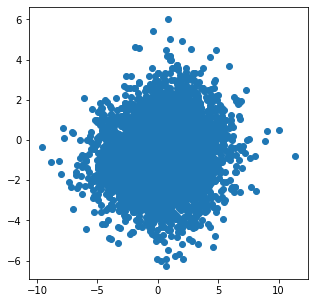

In [155]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

FIG 4A

In [ ]:
from scipy.stats import pearsonr

In [ ]:
cnts.replace([np.inf, -np.inf], np.nan, inplace=True)
cnts_f = cnts.dropna()

In [ ]:
corr, _ = pearsonr(cnts_f["clip_enrichment"], cnts_f["rden_change"])
corr

Text(-7.5, -5.5, 'r = 0.0201')

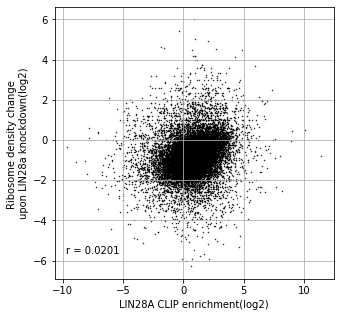

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.grid()
ax.scatter(np.log2(cnts_f['clip_enrichment']),
           np.log2(cnts_f['rden_change']),
           s=0.2,
           c = "black")
plt.xlabel("LIN28A CLIP enrichment(log2)")
plt.ylabel("Ribosome density change \nupon LIN28a knockdown(log2)")
plt.text(-7.5, -5.5,'r = ' + str(round(corr,4)),
     horizontalalignment='center',
     verticalalignment='center')

FIG 5B

In [115]:
integ_df = cnts.loc[:,['clip_enrichment','rden_change']]
integ_df["gene_id"] = [x.split(".")[0] for x in integ_df.index]

In [154]:
integ_df.head()

,clip_enrichment,rden_change,gene_id,Gene names_x,type_x,Gene names_y,type_y
0,2.762901,0.637359,ENSMUSG00000000001,Gnai3,cytoplasm,Gnai3,cytoplasm
1,1.011928,0.521917,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus,Cdc45 Cdc45l Cdc45l2,nucleus
2,NaN,NaN,ENSMUSG00000000049,Apoh B2gp1,cytoplasm,Apoh B2gp1,cytoplasm
3,0.000000,0.000000,ENSMUSG00000000058,Cav2,cytoplasm,Cav2,cytoplasm
4,1.051546,0.277646,ENSMUSG00000000085,Scmh1,nucleus,Scmh1,nucleus


In [153]:
integ_df = integ_df.merge(mouselocal, on="gene_id", how="right")
integ_df.head()

,clip_enrichment,rden_change,gene_id,Gene names_x,type_x,Gene names_y,type_y
0,2.762901,0.637359,ENSMUSG00000000001,Gnai3,cytoplasm,Gnai3,cytoplasm
1,1.011928,0.521917,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus,Cdc45 Cdc45l Cdc45l2,nucleus
2,NaN,NaN,ENSMUSG00000000049,Apoh B2gp1,cytoplasm,Apoh B2gp1,cytoplasm
3,0.000000,0.000000,ENSMUSG00000000058,Cav2,cytoplasm,Cav2,cytoplasm
4,1.051546,0.277646,ENSMUSG00000000085,Scmh1,nucleus,Scmh1,nucleus


In [150]:
sub_df = integ_df_f.iloc[np.random.choice(list(range(integ_df_f.shape[0])), 200),:]

In [159]:
corr, _ = pearsonr(sub_df["clip_enrichment"], sub_df["rden_change"])
corr

0.0743427394691113

Text(5, -5, 'r = 0.0743')

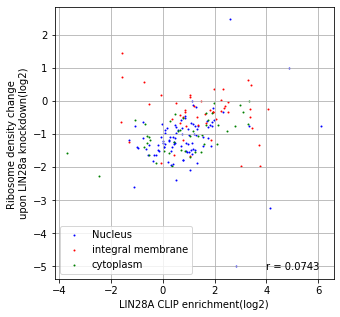

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.grid()

ax.scatter(np.log2(sub_df.loc[sub_df["type"]=="nucleus",'clip_enrichment']),
           np.log2(sub_df.loc[sub_df["type"]=="nucleus",'rden_change']),
           s=1,
           label = "Nucleus",
           c = "blue")
ax.scatter(np.log2(sub_df.loc[sub_df["type"]=="integral membrane",'clip_enrichment']),
           np.log2(sub_df.loc[sub_df["type"]=="integral membrane",'rden_change']),
           s=1,
           label = "integral membrane",
           c = "red")
ax.scatter(np.log2(sub_df.loc[sub_df["type"]=="cytoplasm",'clip_enrichment']),
           np.log2(sub_df.loc[sub_df["type"]=="cytoplasm",'rden_change']),
           s=1,
           label = "cytoplasm",
           c = "green")

plt.legend()
plt.xlabel("LIN28A CLIP enrichment(log2)")
plt.ylabel("Ribosome density change \nupon LIN28a knockdown(log2)")
plt.text(5, -5,'r = ' + str(round(corr,4)),
     horizontalalignment='center',
     verticalalignment='center')